In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key


In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs=zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
!pip install citipy

In [5]:
# Use the citipy module to determine city based on latitude and longitude
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination. 
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

583

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a24ac4e4a9c4dfebf3377cb440b58290


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuktoyaktuk
Processing Record 2 of Set 1 | sorong
Processing Record 3 of Set 1 | honnali
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | lagoa
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | pervomayskiy
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | moose factory
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | nguiu
City not found. Skipping...
Processing Record 20 of Set 1 | pangnirt

Processing Record 37 of Set 4 | hami
Processing Record 38 of Set 4 | chancay
Processing Record 39 of Set 4 | kiama
Processing Record 40 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 4 | zacatepec
Processing Record 42 of Set 4 | butka
Processing Record 43 of Set 4 | barrow
Processing Record 44 of Set 4 | belaya gora
Processing Record 45 of Set 4 | sao filipe
Processing Record 46 of Set 4 | trincomalee
Processing Record 47 of Set 4 | san cristobal
Processing Record 48 of Set 4 | gat
Processing Record 49 of Set 4 | yzeure
Processing Record 50 of Set 4 | college
Processing Record 1 of Set 5 | bethel
Processing Record 2 of Set 5 | vao
Processing Record 3 of Set 5 | isla vista
Processing Record 4 of Set 5 | aptos
Processing Record 5 of Set 5 | saint anthony
Processing Record 6 of Set 5 | longyearbyen
Processing Record 7 of Set 5 | smithers
Processing Record 8 of Set 5 | pevek
Processing Record 9 of Set 5 | torbay
Processing Record 10 of Set 5 | bud
Processin

Processing Record 28 of Set 8 | pitimbu
Processing Record 29 of Set 8 | norrtalje
Processing Record 30 of Set 8 | adre
Processing Record 31 of Set 8 | kamuli
Processing Record 32 of Set 8 | cervo
Processing Record 33 of Set 8 | coahuayana
Processing Record 34 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 35 of Set 8 | doha
Processing Record 36 of Set 8 | tiruvottiyur
City not found. Skipping...
Processing Record 37 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 38 of Set 8 | sorland
Processing Record 39 of Set 8 | ocean city
Processing Record 40 of Set 8 | bubaque
Processing Record 41 of Set 8 | qabis
City not found. Skipping...
Processing Record 42 of Set 8 | santo antonio do ica
Processing Record 43 of Set 8 | taft
Processing Record 44 of Set 8 | nome
Processing Record 45 of Set 8 | lompoc
Processing Record 46 of Set 8 | mitsamiouli
Processing Record 47 of Set 8 | tortoli
Processing Record 48 of Set 8 | shimoda
Processing Record 49 of Set 8 | 

Processing Record 16 of Set 12 | kayes
Processing Record 17 of Set 12 | gornopravdinsk
Processing Record 18 of Set 12 | ukholovo
Processing Record 19 of Set 12 | iranshahr
Processing Record 20 of Set 12 | boende
Processing Record 21 of Set 12 | maple creek
Processing Record 22 of Set 12 | valleyview
Processing Record 23 of Set 12 | manzhouli
Processing Record 24 of Set 12 | maxixe
Processing Record 25 of Set 12 | minab
Processing Record 26 of Set 12 | williams lake
Processing Record 27 of Set 12 | port macquarie
Processing Record 28 of Set 12 | beaverton
Processing Record 29 of Set 12 | waingapu
Processing Record 30 of Set 12 | buchanan
Processing Record 31 of Set 12 | neiafu
Processing Record 32 of Set 12 | helena
Processing Record 33 of Set 12 | talaya
-----------------------------
Data Retrieval Complete      
-----------------------------


In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tuktoyaktuk,69.4541,-133.0374,-16.60,76,40,12.66,CA,2021-01-26 20:42:19
1,Sorong,-0.8833,131.2500,76.71,89,100,3.47,ID,2021-01-26 20:42:19
2,Honnali,14.2500,75.6667,66.15,33,42,5.28,IN,2021-01-26 20:42:19
3,Punta Arenas,-53.1500,-70.9167,50.00,46,20,32.21,CL,2021-01-26 20:41:22
4,Rikitea,-23.1203,-134.9692,80.15,69,33,11.86,PF,2021-01-26 20:42:20


In [11]:
new_column_order =['City','Country','Date','Lat',
                  'Lng', 'Max Temp', 'Humidity',
                  'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

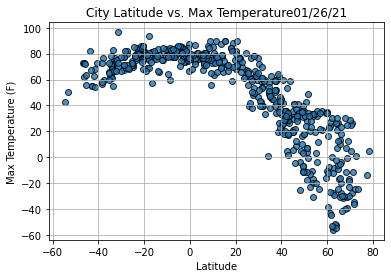

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs max. temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black" , linewidth = 1, marker ='o',
            alpha = 0.8, label = "Cities")
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature" + time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

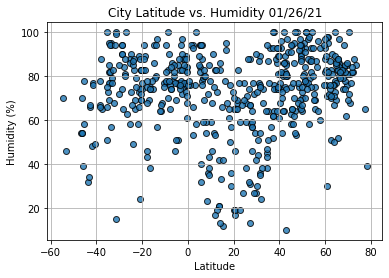

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

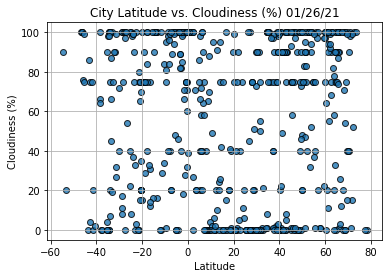

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties.